# 2段目を溶着した後のファイバーで光量の変化を測定する。

1回目：11/29 22:27:21 \
2回目：11/30 14:32:36 \
3回目：11/30 17:31:11

## Remark
### インプットファイルの要件
- ファイバー➀と➁のみ計測
- 元データのCSVが時系列順で[ForwardPedestal, signal, BackwardPedestal]の順に並んでいる。
- ch1で奇数番目のファイバー、ch2で偶数番目のファイバーを読んでいる(ch2を使わない場合はch2を無視して良い。)
- ch1のファイバー番号の方がch2のファイバー番号より若い

0回目の溶着\
	4回の測定データ\
1回目の溶着\
	4回の測定データ\
2回目の溶着\
	4回の測定データ




In [7]:
#import glob as glob
#import pandas as pd 
#import numpy as np 
#import csv
#
#
#date = '2023-11-29-222721' # 125℃120min　溶着前
##date = '2023-11-30-143236' # 125℃120min　1回目
##date = '2023-11-30-173111' # 125℃120min　2回目
#
#outFileName = f'output_logger2signal{date}.csv'
#csv_files = sorted(glob.glob(f'../../logger_data/{date}/*.csv'))
#
#nchannel = 2
#data_2dim = []
#
#for file in csv_files:
#    mydf = pd.read_csv(file,
#                      names=['No.', 'time', 'ms', 'Ch1 [V]', 'Ch2 [V]',
#                             'Ch3 [V]', 'Ch4 [V]', 'Alarm [V]', 'AlarmOut [V]'],
#                      usecols=['Ch1 [V]', 'Ch2 [V]'],
#                      encoding="Shift-JIS",
#                      skiprows=21)
#
#    mean_values = mydf[['Ch1 [V]', 'Ch2 [V]']].mean().values
#    print("\nmydf[['Ch1 [V]', 'Ch2 [V]']].mean() = \n",mydf[['Ch1 [V]', 'Ch2 [V]']].mean())
#    print("\nmean_values = ", mean_values)
#
#    data_2dim.append(mean_values)
#
#dataRaw = np.array(data_2dim)
#print("dataRaw=", dataRaw)
#
## グループのサイズを定義
#ngroup = 3
#
## ループの回数を計算
#ndataset = len(dataRaw) // ngroup
#print(ndataset)
#data_pedestal_subtracted = np.empty(0)
#
## グループごとに処理
#for i in range(ndataset):
#    row_start = ngroup * i
#    row_end = ngroup * (i + 1)
#    averagePedestal = np.mean(dataRaw[row_start:row_end:2], axis=0)
#    #print("dataRaw[row_start:row_end:2]= \n",dataRaw[row_start:row_end:2])
#    #print("average=",averagePedestal,"\n")
#    data_pedestal_subtracted = np.append(data_pedestal_subtracted, dataRaw[row_start + 1] - averagePedestal)
#
#print(data_pedestal_subtracted.reshape(-1, 2))
#


mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    0.003882
Ch2 [V]    0.003941
dtype: float64

mean_values =  [0.00388235 0.00394118]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    3.02416
Ch2 [V]    2.71328
dtype: float64

mean_values =  [3.02416 2.71328]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    0.003909
Ch2 [V]    0.004000
dtype: float64

mean_values =  [0.00390909 0.004     ]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    0.003706
Ch2 [V]    0.004412
dtype: float64

mean_values =  [0.00370588 0.00441176]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    2.77928
Ch2 [V]    3.33416
dtype: float64

mean_values =  [2.77928 3.33416]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    0.00432
Ch2 [V]    0.00428
dtype: float64

mean_values =  [0.00432 0.00428]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    0.00388
Ch2 [V]    0.00396
dtype: float64

mean_values =  [0.00388 0.00396]

mydf[['Ch1 [V]', 'Ch2 [V]']].mean() = 
 Ch1 [V]    3.06880
Ch2 [V]    2.91272
d

In [13]:
import glob as glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_csv(file):
    return pd.read_csv(file, names=columns, usecols=channels, encoding="Shift-JIS", skiprows=header_rows)

def calculate_means(dataframe):
    return dataframe.mean().values

def calculate_standard_errors(dataArray):
    return np.std(dataArray,axis=0,ddof=1) / np.sqrt(len(dataArray))

def process_groups(data, ngroup_size):
    num_groups = len(data) // group_size
    result = np.empty(0)

    for i in range(num_groups):
        start, end = group_size * i, group_size * (i + 1)
        average_pedestal = np.mean(data[start:end:2], axis=0)
        result = np.append(result, data[start + 1] - average_pedestal)

    return result.reshape(-1, len(channels))

# 日付: 125dC120min　溶着前, 1回目,　2回目　
dates = ['2023-11-29-222721', '2023-11-30-143236', '2023-11-30-173111']

# 列名と使用する列
columns = ['No.', 'time', 'ms', 'Ch1 [V]', 'Ch2 [V]', 'Ch3 [V]', 'Ch4 [V]', 'Alarm [V]', 'AlarmOut [V]']
channels = ['Ch1 [V]', 'Ch2 [V]']
header_rows = 21

# 新しい二次元配列を作成
all_averages = []

for date in dates:
    # CSVファイルのパス
    csv_files = sorted(glob.glob(f'../../logger_data/{date}/*.csv'))

    # CSVファイルからデータを読み込んで平均値を計算
    data_raw = np.array([calculate_means(read_csv(file)) for file in csv_files])
    print(f"\ndata_raw ({date}) =\n", data_raw)	

    # グループごとに処理して結果を出力
    group_size = len(dates)
    data_pedestal_subtracted = process_groups(data_raw, group_size)
    print(f"data_pedestal_subtracted ({date}) =\n", data_pedestal_subtracted)

    # 列ごとの平均値を計算
    column_means = np.mean(data_pedestal_subtracted, axis=0)
    #column_sems = calculate_standard_errors(data_pedestal_subtracted)
    column_sems = np.std(data_pedestal_subtracted,axis=0,ddof=1)/np.sqrt(len(data_pedestal_subtracted)) #ddof=1 標準偏差(n-1で割る方)
    print(f"Column Means ({date}) =", column_means,column_sems)

    # 平均を新たな二次元配列に追加
    all_averages.append([column_means,column_sems])

# 最終的な平均の二次元配列
all_averages_array = np.array(all_averages).reshape(-1,4)
print("\nAll Averages =\n", all_averages)
print("\nAll Averages Array =\n", all_averages_array)







data_raw (2023-11-29-222721) =
 [[3.88235294e-03 3.94117647e-03]
 [3.02416000e+00 2.71328000e+00]
 [3.90909091e-03 4.00000000e-03]
 [3.70588235e-03 4.41176471e-03]
 [2.77928000e+00 3.33416000e+00]
 [4.32000000e-03 4.28000000e-03]
 [3.88000000e-03 3.96000000e-03]
 [3.06880000e+00 2.91272000e+00]
 [3.72000000e-03 3.88000000e-03]
 [3.80000000e-03 2.60000000e-03]
 [2.79728000e+00 3.38304000e+00]
 [3.52000000e-03 4.04000000e-03]]
data_pedestal_subtracted (2023-11-29-222721) =
 [[3.02026428 2.70930941]
 [2.77526706 3.32981412]
 [3.065      2.9088    ]
 [2.79362    3.37972   ]]
Column Means (2023-11-29-222721) = [2.91353783 3.08191088] [0.07518334 0.16303004]

data_raw (2023-11-30-143236) =
 [[0.00384    0.00376   ]
 [3.01992    2.67712   ]
 [0.00408    0.00368   ]
 [0.00384    0.004     ]
 [2.99424    2.64876   ]
 [0.00396    0.00404   ]
 [0.00368    0.00372   ]
 [2.99104    2.67684   ]
 [0.00436    0.00408   ]
 [0.0040303  0.00381818]
 [2.993      2.56782353]
 [0.00384848 0.004     ]]
data

[0.         0.02663474 0.02877357]
[0.         0.0460613  0.04419738]


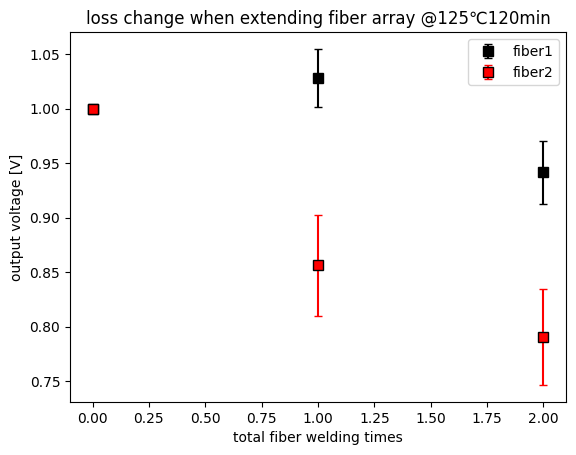

fiber1 loss(0 times/2 times) = 0.9417122958289142 

fiber2 loss(0 times/2 times) = 0.7906456576277259 



In [34]:
fig, ax = plt.subplots()
x = list(range(group_size))
colors = ['black','red','blue','green']

for jchannel in range (0,len(channels)):
	#for iweld in range(0,3): 
	originalSignalHight = all_averages_array[0,jchannel]
	ratioOfSignalHight = all_averages_array[:,jchannel] / originalSignalHight
	ratioOfSignalHightErr = ratioOfSignalHight*np.sqrt(
		np.square(all_averages_array[:,jchannel+2]/all_averages_array[:,jchannel])
		+np.square(all_averages_array[0,jchannel+2]/all_averages_array[0,jchannel])
		)
	# Remark:
	#	誤差伝播則はそれぞれの誤差が互いに独立な場合に成り立つので、0回目の溶着の誤差は0である。
	ratioOfSignalHightErr[0]=0
	ax.errorbar(x, ratioOfSignalHight, yerr=ratioOfSignalHightErr, capsize=3, fmt='s'
	            , ecolor=colors[jchannel], color=colors[jchannel],ms=7, mec='k'
	            , label=f'fiber{jchannel+1}')
ax.set_xlabel('total fiber welding times')
ax.set_ylabel('output voltage [V]')
ax.legend()
ax.set_title('loss change when extending fiber array @125℃120min')
plt.show()

print('fiber1 loss(0 times/2 times) =',all_averages_array[2][0]/all_averages_array[0][0],'\n')
print('fiber2 loss(0 times/2 times) =',all_averages_array[2][1]/all_averages_array[0][1],'\n')



All Averages Array =
 [[[2.91353783 3.08191088]
  [0.07518334 0.16303004]]

 [[2.99559515 2.63874861]
  [0.00682262 0.02582928]]

 [[2.7437144  2.43669946]
  [0.04489053 0.04403256]]]


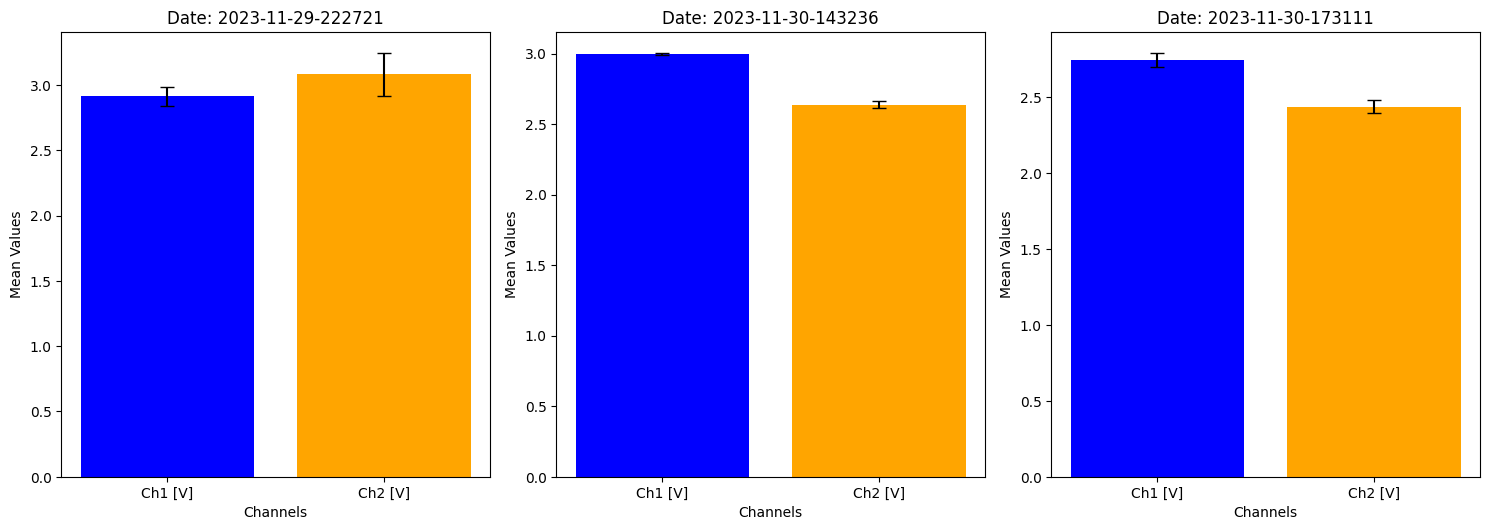

In [72]:
fig, ax = plt.subplots()
x = list(range(group_size))
colors = ['black','red','blue','green']

for jchannel in range (0,len(channels)):
	ax.errorbar(x, all_averages_array[:,jchannel], yerr=all_averages_array[:,jchannel+2], capsize=3, fmt='s'
	            , ecolor=colors[jchannel], color=colors[jchannel],ms=7, mec='k'
	            , label=f'fiber{jchannel+1}')
ax.set_xlabel('total fiber welding times')
ax.set_ylabel('output voltage [V]')
ax.legend()
ax.set_title('loss change when extending fiber array @125℃120min')
plt.show()

print('fiber1 loss(0 times/2 times) =',all_averages_array[2][0]/all_averages_array[0][0],'\n')
print('fiber2 loss(0 times/2 times) =',all_averages_array[2][1]/all_averages_array[0][1],'\n')
